# Using Python for Research Homework: Week 5, Case Study Part 1

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In Part 1, we will inspect, clean, and transform the data.

### Exercise 1

First, we will import several libraries. `scikit-learn` (**sklearn**) contains helpful statistical models, and we'll use the `matplotlib.pyplot` library for visualizations. Of course, we will use `numpy` and `pandas` for data manipulation throughout.

#### Instructions 

- Read and execute the given code.
- Call `df.head()` to take a look at the data.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

df = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@movie_data.csv", index_col=0)

# Enter code here.
df.head()

In [ ]:
df.info()

### Exercise 2

In this exercise, we will define the regression and classification outcomes. Specifically, we will use the `revenue` column as the target for regression. For classification, we will construct an indicator of profitability for each movie.

#### Instructions 
- Create a new column in `df` called `profitable`, defined as 1 if the movie `revenue` is greater than the movie `budget`, and 0 otherwise.
- Next, define and store the outcomes we will use for regression and classification.
    - Define `regression_target` as the string `'revenue'`.
    - Define `classification_target` as the string `'profitable'`.

In [4]:
# Enter code here.
df['profitable'] = (df['revenue'] > df['budget']).astype(int)


In [6]:
regression_target = 'revenue'
classification_target = 'profitable'

### Exercise 3

For simplicity, we will proceed by analyzing only the rows without any missing data. In this exercise, we will remove rows with any infinite or missing values.

#### Instructions 

- Use `df.replace()` to replace any cells with type `np.inf` or `-np.inf` with `np.nan`.
- Drop all rows with any `np.nan` values in that row using `df.dropna()`. Do any further arguments need to be specified in this function to remove rows with any such values?

In [7]:
# Enter code here.
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

### Exercise 4

Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. Let's add indicator columns for each genre.

#### Instructions 

- Determine all the genres in the genre column. Make sure to use the `strip()` function on each genre to remove trailing characters.
- Next, include each listed genre as a new column in the dataframe. Each element of these genre columns should be 1 if the movie belongs to that particular genre, and 0 otherwise. Keep in mind, a movie may belong to several genres at once.
- Call `df[genres].head()` to view your results.

In [12]:
# Enter code here.
genres = list()

for genre in df.genres:
  movie_genre = genre.split(',')
  for e in movie_genre:
    e = e.strip()
    if e not in genres:
      genres.append(e)
    else:
      continue

In [25]:
for g in genres:
  df[g] = df['genres'].apply(lambda x: 1 if g in x else 0)

In [ ]:
df[genres].head()

### Exercise 5

Some variables in the dataset are already numeric and perhaps useful for regression and classification. In this exercise, we will store the names of these variables for future use. We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. Finally, we will evaluate the skew of each variable.

#### Instructions 
- Call `plt.show()` to observe the plot below.
    - Which of the covariates and/or outcomes are correlated with each other?
- Call `skew()` on the columns `outcomes_and_continuous_covariates` in df.
    - Is the skew above 1 for any of these variables?

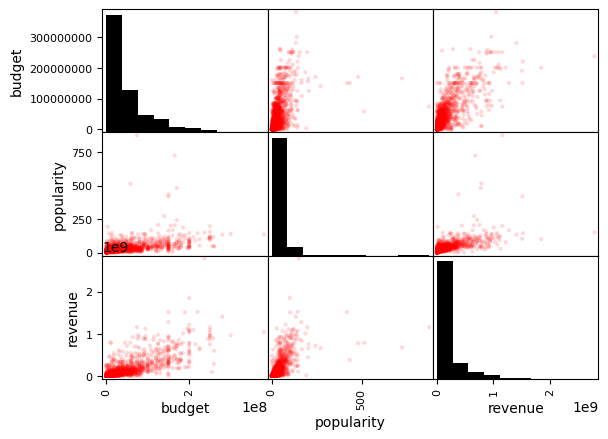

In [29]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

axes = pd.plotting.scatter_matrix(df[plotting_variables], alpha=0.15, \
       color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(1,0,0))
plt.show()# show the plot.

# determine the skew.
skewness = df[outcomes_and_continuous_covariates].skew()

In [46]:
print(skewness)

budget         -2.816990
popularity     -0.431543
runtime         0.530489
vote_count     -0.677632
vote_average   -5.085715
revenue        -2.177372
profitable     -1.081030
dtype: float64


In [41]:
print(skewness.index)

Index(['budget', 'popularity', 'runtime', 'vote_count', 'vote_average',
       'revenue', 'profitable'],
      dtype='object')


### Exercise 6

It appears that the variables `budget`, `popularity`, `runtime`, `vote_count`, and `revenue` are all right-skewed. In this exercise, we will transform these variables to eliminate this skewness. Specifically, we will use the `np.log10()` method. Because some of these variable values are exactly 0, we will add a small positive value to each to ensure it is defined; this is necessary because log(0) is negative infinity.

#### Instructions 
- For each above-mentioned variable in `df`, transform value `x` into `np.log10(1+x)`.

In [42]:
skewed_variables = ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']

In [44]:
for v in skewed_variables:
  df[v] = np.log10(1+df[v])

### Exercise 7

Let's now save our dataset. 

#### Instructions 
- Use `to_csv()` to save the `df` object as `movies_clean.csv`.

In [48]:
# Enter your code here
df.to_csv('movies_clean.csv')